# A2. Understanding and Implementing LSTM from Scratch

**Objectives:** The goal of this project is to gain a deep understanding of Long Short-Term Memory (LSTM) networks by implementing LSTM manually. ”Manually” means that you cannot use the built-in LSTM libraries like torch.nn.LSTM in Pytorch, tf.keras.layers.LSTM in tensorflow, LSTM in MatLab Deep Learning Toolbox, ect., to call LSTM directly; you need to construct a LSTM network from scratch.

**Requirements:**

1) Read the original LSTM paper “Long Short-Term Memory” by Hochreiter & Schmidhuber (1997) or other papers that introduce LSTM; understand LSTM, especially the gating mechanism and training mechanism in an LSTM.

2) Manually implementing LSTM from scratch: use only basic matrix operations and activation functions; implements a single LSTM cell that processes one timestep at a time, and then extending LSTM Cell to a full sequence.

3) Train your LSTM on the following task using the attached dataset ”Car data.zip”:
    - **Dataset Description:** The dataset ”Car data.zip” consists of 18,457 files. Each file contains data for 12 labels, observed over 67 time steps. The data include:
        1) Coordinates (x, y) of the car; 
        2) Velocity; 
        3) Acceleration; 
        4) Distance from the centerline; 
        5) Indicators if there’s a car on the left, right, or front; 
        6) Distance from your vehicle to other cars.

    - Prediction Task: Your LSTM model should be trained to predict the (x, y) coordinates of the vehicle for the upcoming 5 time steps. 
    - Error Rate: Evaluate the performance of your model using suitable error metrics like the Root Mean Square Error (RMSE) or any other loss function you find appropriate.
    - Data Usage: While the dataset provides a range of data labels, you can decide how many labels you want to use. You might choose to use only the car’s coordinates, or you could incorporate more information to potentially enhance your model’s predictions. Also, determine the portion of training, validation, testing dataset by yourself.
    - Data Continuity: Although the data is continuous across many files, it does restart at random points. It is recommended to consider each file (12 labels x 67 observations) as an individual training unit. For example, use the first 12 labels x 62 observations as the input and the corresponding 2 labels x 5 observations as the output to train the LSTM network.
**Note that it is very flexible to process the data and the way of processing them depends on you.**
4) Record the prediction performance using the testing dataset you divide in the step 3).
5) Adjust the hyperparameters and train again, and then record, compare, and discuss the corresponding results. Try to improve the prediction accuracy, which will be positively correlated to your final grade.

**Deliverables:** Submit a PDF report summarizing model interpretations, implementation, experiments, results, and discussions. Source codes need to be attached in the end of this report.

['data/car_data/17553.csv', 'data/car_data/15736.csv', 'data/car_data/11653.csv', 'data/car_data/1769.csv', 'data/car_data/15841.csv', 'data/car_data/13901.csv', 'data/car_data/10136.csv', 'data/car_data/14311.csv', 'data/car_data/15350.csv', 'data/car_data/10097.csv', 'data/car_data/17371.csv', 'data/car_data/10850.csv', 'data/car_data/10270.csv', 'data/car_data/15215.csv', 'data/car_data/1346.csv', 'data/car_data/18363.csv', 'data/car_data/11836.csv', 'data/car_data/17383.csv', 'data/car_data/10022.csv', 'data/car_data/10708.csv', 'data/car_data/16817.csv', 'data/car_data/15838.csv', 'data/car_data/16424.csv', 'data/car_data/17557.csv', 'data/car_data/11754.csv', 'data/car_data/17450.csv', 'data/car_data/15083.csv', 'data/car_data/17050.csv', 'data/car_data/16294.csv', 'data/car_data/14456.csv', 'data/car_data/17551.csv', 'data/car_data/14314.csv', 'data/car_data/14244.csv', 'data/car_data/14927.csv', 'data/car_data/17591.csv', 'data/car_data/16652.csv', 'data/car_data/14816.csv', 'd

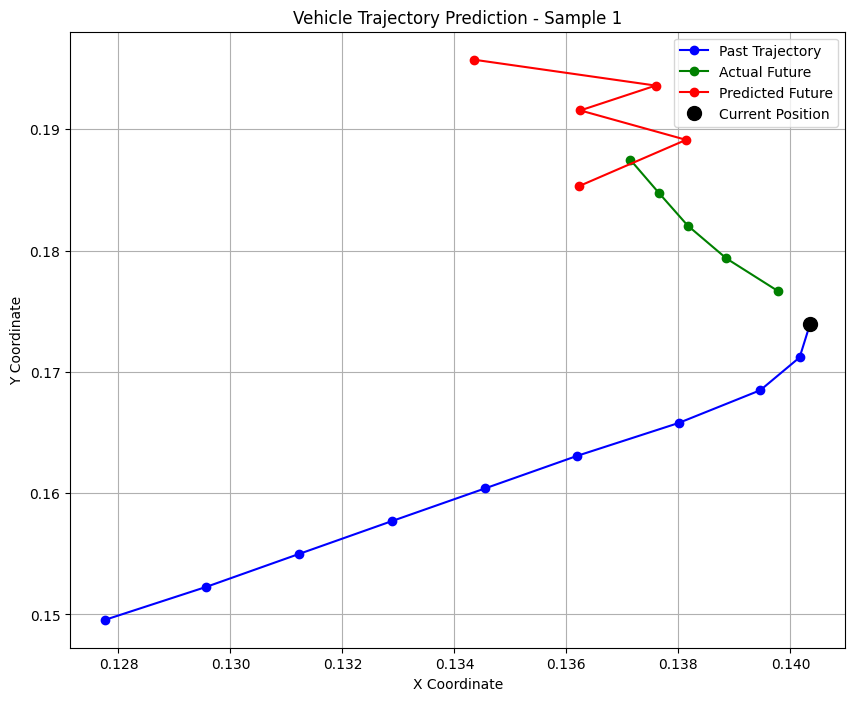

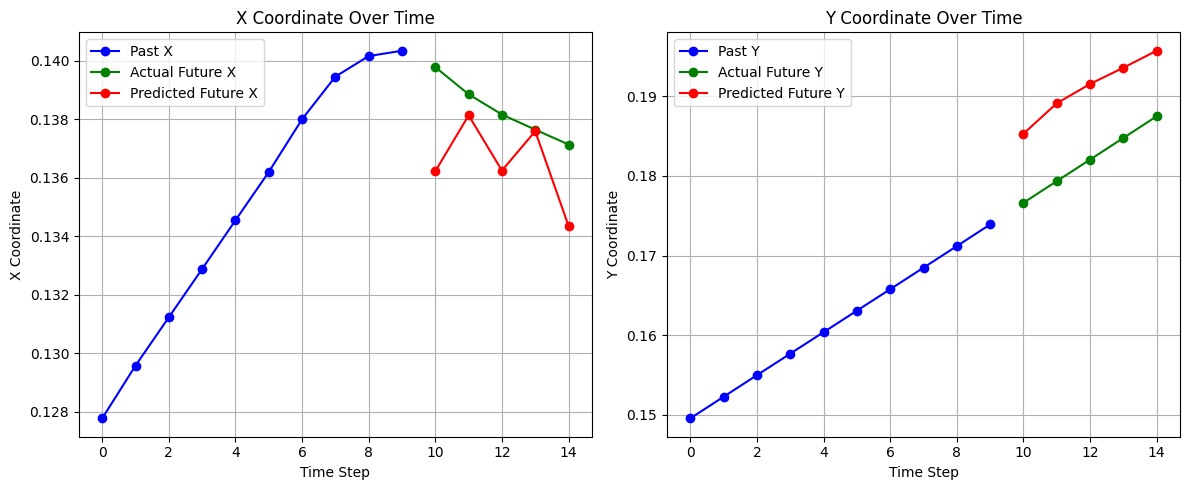

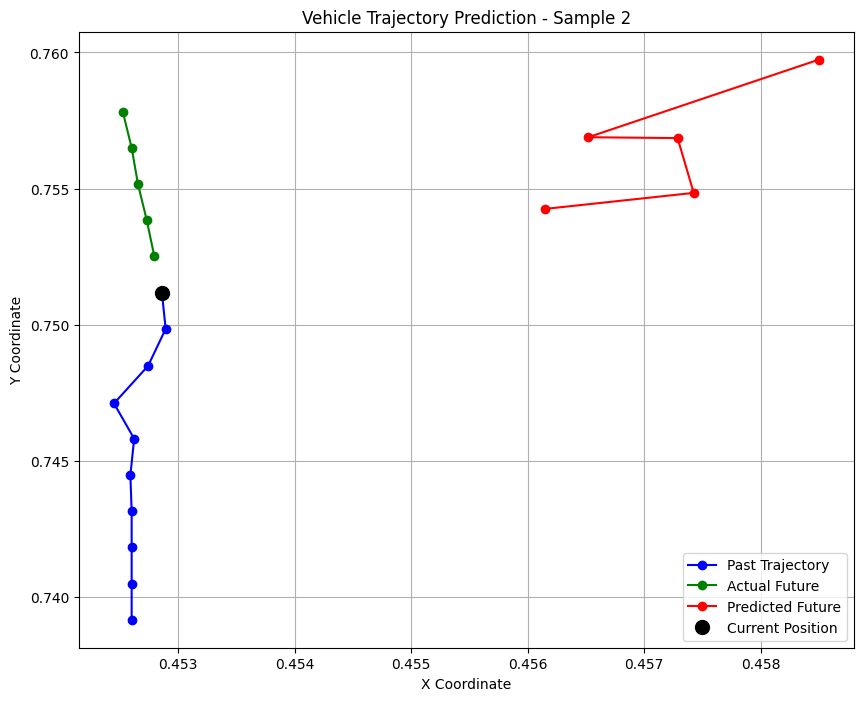

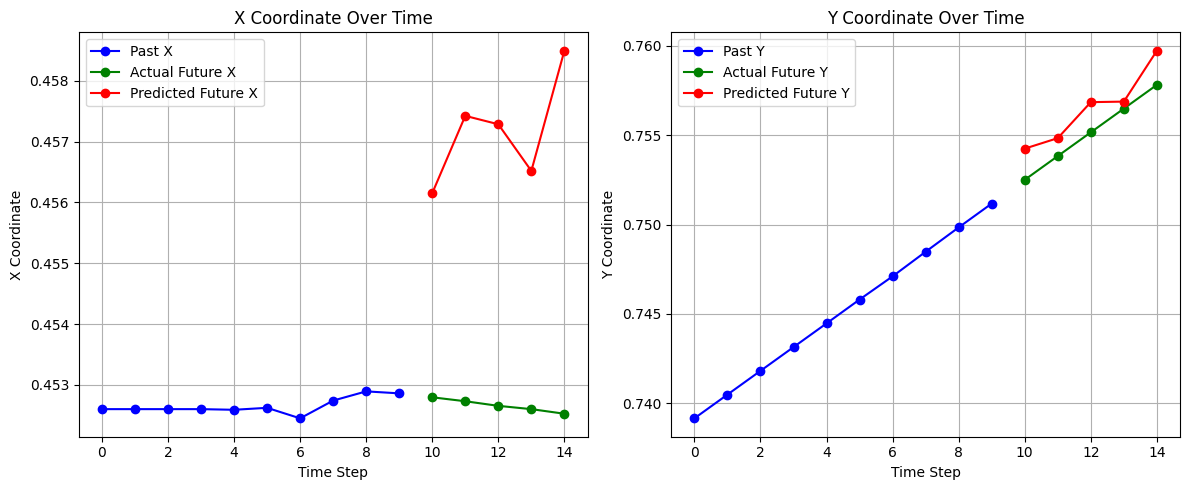

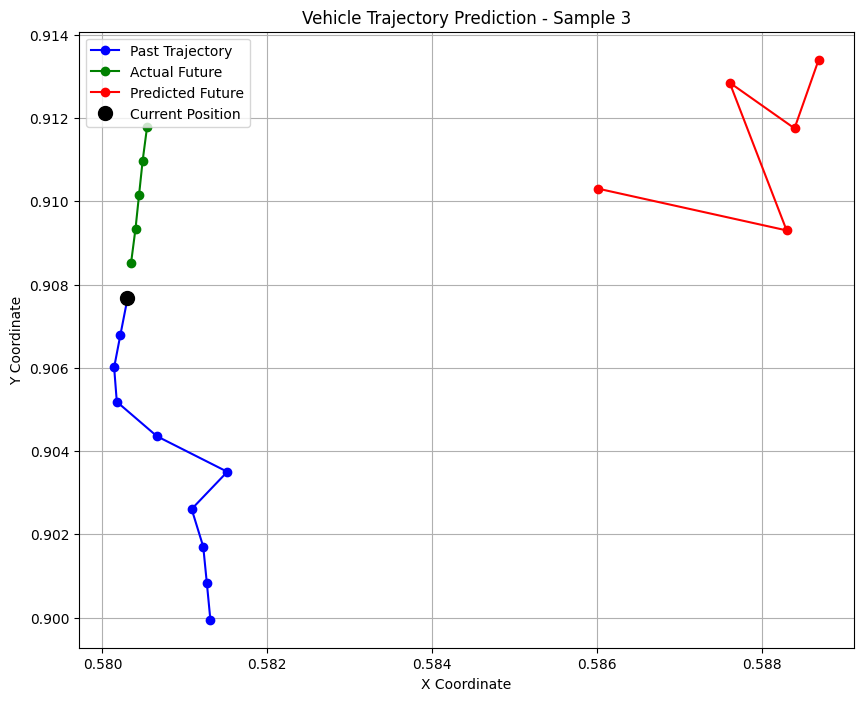

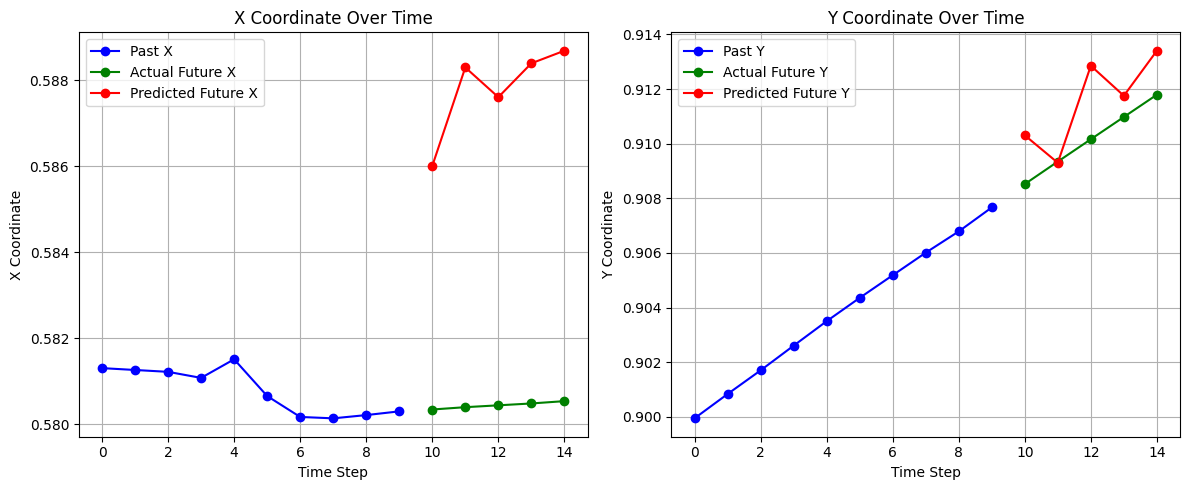

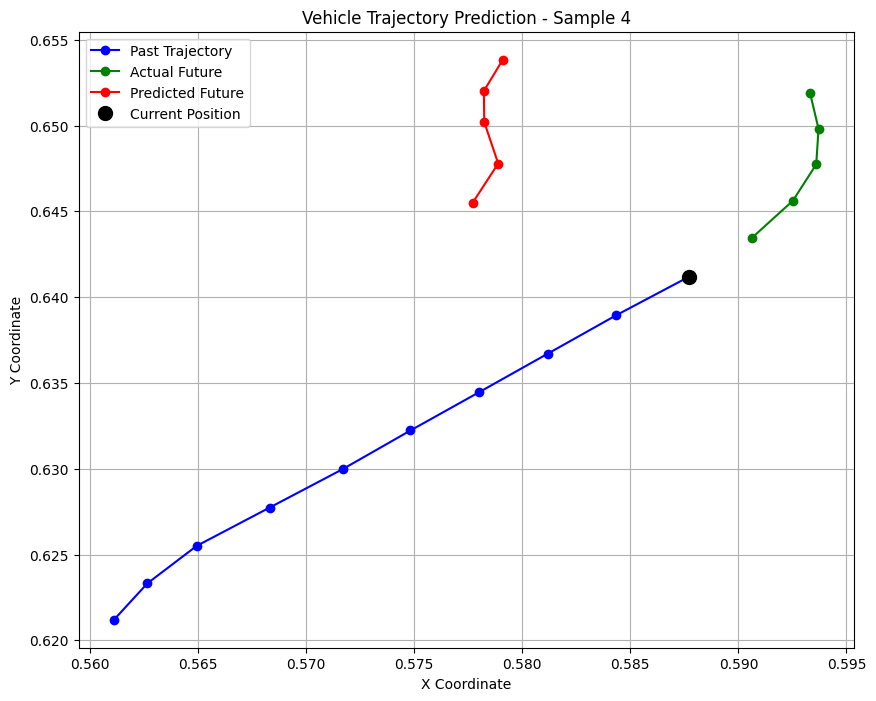

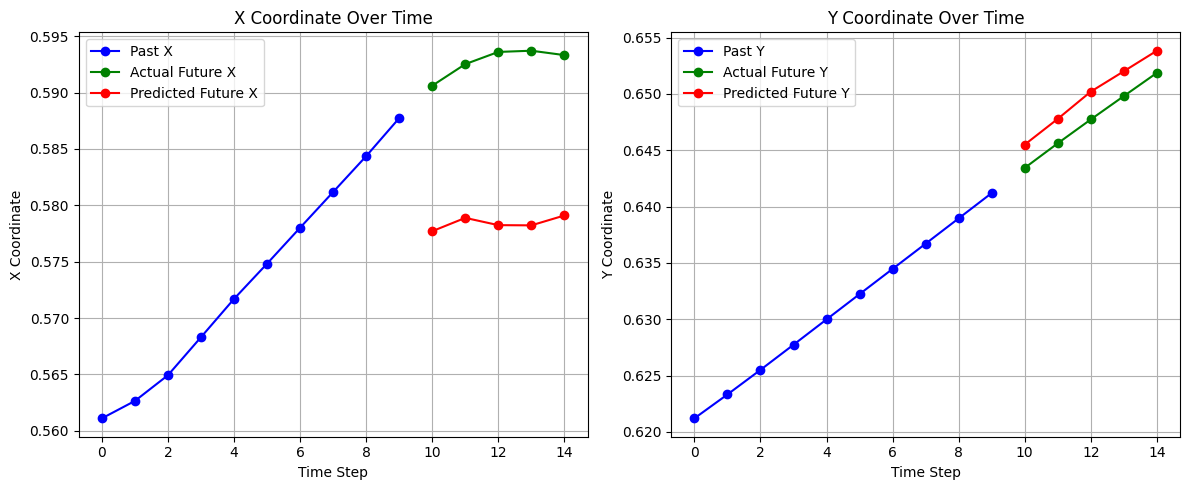

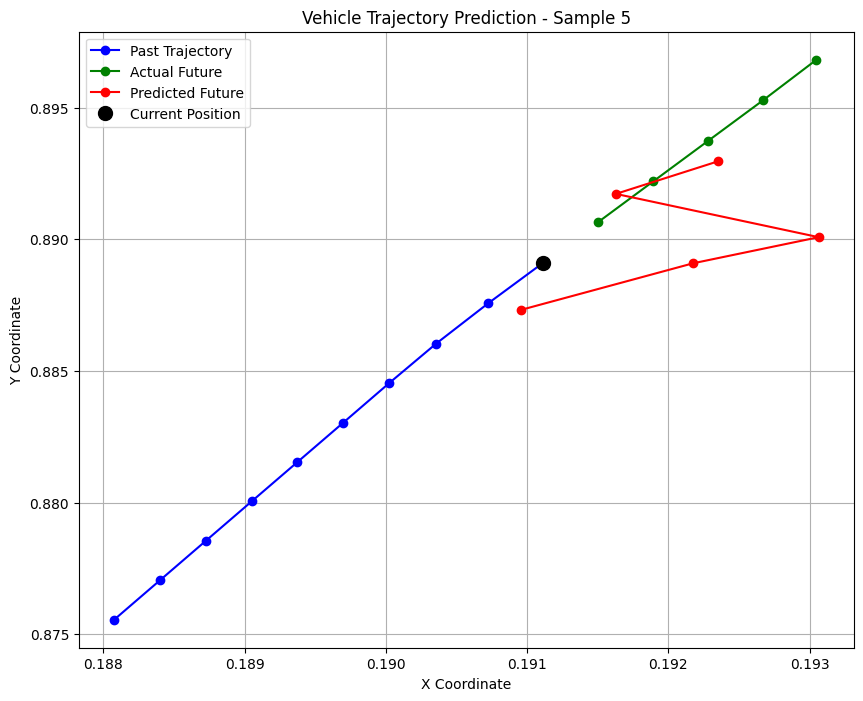

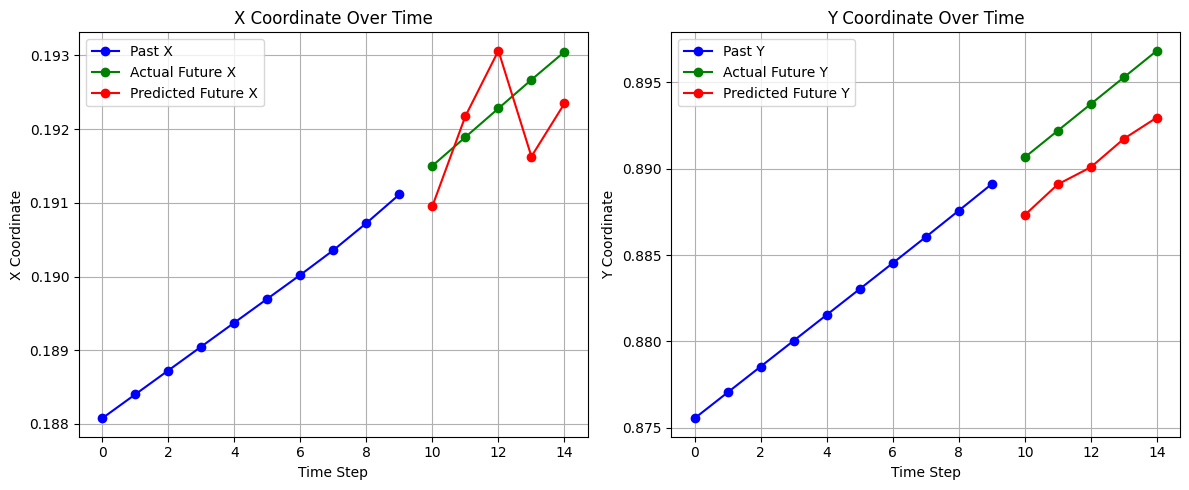

MSE: 0.000039
RMSE: 0.006252
MAE: 0.004608
MAPE: 1.23%


In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import zipfile
from torch.utils.data import DataLoader, TensorDataset

# # Extract and load data
# with zipfile.ZipFile("data/Car_data.zip", "r") as zip_ref:
#     zip_ref.extractall("car_data")

# List all CSV files
csv_files = [os.path.join("data/car_data", f) for f in os.listdir("data/car_data") if f.endswith('.csv')]

print(csv_files)
print(len(csv_files))

# data_80 = int(len(csv_files) * 0.8)
# trainset = csv_files[:data_80]
# testset = csv_files[data_80:]
# print (len(trainset))
# print (len(testset))
# print((len(trainset) + len(testset))== len(csv_files))


# # Initialize scalers for each feature
# scaler = MinMaxScaler()

# # Lists to store sequences
# all_sequences = []

# # Process each file
# for file_path in trainset:
#     # Read CSV
#     df = pd.read_csv(file_path)
    
#     # Scale the data
#     scaled_data = scaler.fit_transform(df.values)
    
#     # Store the sequence
#     all_sequences.append(scaled_data)

# # Create input/output sequences
# X = []  # Input: 62 time steps
# y = []  # Output: next 5 time steps

# for sequence in all_sequences:
#     # Only use sequences with enough time steps
#     if len(sequence) >= 67:
#         for i in range(len(sequence) - 67 + 1):
#             X.append(sequence[i:i+62, :])  # 62 time steps as input
#             y.append(sequence[i+62:i+67, :])  # next 5 time steps as output

# # Convert to PyTorch tensors
# X = torch.tensor(np.array(X), dtype=torch.float32)
# y = torch.tensor(np.array(y), dtype=torch.float32)

# # Create DataLoader
# dataset = TensorDataset(X, y)
# batch_size = 32
# train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# class VehicleLSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_time_steps, output_features):
#         super(VehicleLSTM, self).__init__()
        
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.output_time_steps = output_time_steps
#         self.output_features = output_features
        
#         # LSTM layers
#         self.lstm = nn.LSTM(
#             input_size=input_size,
#             hidden_size=hidden_size,
#             num_layers=num_layers,
#             batch_first=True,
#             dropout=0.2
#         )
        
#         # Fully connected layer to predict multiple time steps
#         self.fc = nn.Linear(hidden_size, output_time_steps * output_features)
        
#     def forward(self, x):
#         # x shape: (batch_size, sequence_length, input_size)
        
#         # Initialize hidden state and cell state
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
#         # Forward propagate through LSTM
#         out, _ = self.lstm(x, (h0, c0))
        
#         # Use only the last output of the sequence
#         out = self.fc(out[:, -1, :])
        
#         # Reshape to (batch_size, output_time_steps, output_features)
#         out = out.view(-1, self.output_time_steps, self.output_features)
        
#         return out

# # Model parameters
# input_size = 12  # Number of features
# hidden_size = 128
# num_layers = 2
# output_time_steps = 5
# output_features = 12

# # Initialize model
# model = VehicleLSTM(input_size, hidden_size, num_layers, output_time_steps, output_features)


# # Loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Training loop
# num_epochs = 100
# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0
    
#     for batch_idx, (data, target) in enumerate(train_loader):
#         # Move data to device
#         data, target = data.to(device), target.to(device)
        
#         # Forward pass
#         output = model(data)
#         loss = criterion(output, target)
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         total_loss += loss.item()
        
#     # Print epoch statistics
#     avg_loss = total_loss / len(train_loader)
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# # Save the model
# torch.save(model.state_dict(), 'vehicle_lstm_model.pth')


# def predict_next_steps(model, sequence, device):
#     model.eval()
#     with torch.no_grad():
#         sequence_tensor = torch.tensor(sequence, dtype=torch.float32).unsqueeze(0).to(device)
#         predictions = model(sequence_tensor)
#         return predictions.cpu().numpy()[0]  # Return as numpy array

# # Example: predict using the first 62 time steps of a sequence
# test_sequence = all_sequences[0][:62, :]
# predictions = predict_next_steps(model, test_sequence, device)

# # Inverse transform to get original scale
# predictions_original_scale = scaler.inverse_transform(predictions)

# Modify your data preparation to include a validation set

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import zipfile
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# List all CSV files
csv_files = [os.path.join("data/car_data", f) for f in os.listdir("data/car_data") if f.endswith('.csv')]

print(f"Total files: {len(csv_files)}")

# Split into train/test sets
data_80 = int(len(csv_files) * 0.8)
trainset = csv_files[:data_80]
testset = csv_files[data_80:]
print(f"Training files: {len(trainset)}")
print(f"Testing files: {len(testset)}")
print(f"Verification: {(len(trainset) + len(testset)) == len(csv_files)}")

# Fit scaler on all training data
all_train_data = []
for file_path in trainset:
    df = pd.read_csv(file_path)
    all_train_data.append(df.values)
    
all_train_data = np.vstack(all_train_data)
scaler = MinMaxScaler()
scaler.fit(all_train_data)

# Lists to store sequences
all_sequences = []

# Process each file
for file_path in trainset:
    # Read CSV
    df = pd.read_csv(file_path)
    
    # Scale the data
    scaled_data = scaler.transform(df.values)
    
    # Store the sequence
    all_sequences.append(scaled_data)

# Create input/output sequences
X = []  # Input: 62 time steps, all 12 features
y = []  # Output: next 5 time steps, only x,y coordinates

for sequence in all_sequences:
    # Only use sequences with enough time steps
    if len(sequence) >= 67:
        for i in range(len(sequence) - 67 + 1):
            X.append(sequence[i:i+62, :])  # 62 time steps as input, all features
            y.append(sequence[i+62:i+67, :2])  # next 5 time steps, only x,y coordinates

# Convert to PyTorch tensors
X = torch.tensor(np.array(X), dtype=torch.float32)
y = torch.tensor(np.array(y), dtype=torch.float32)

# Create DataLoader
dataset = TensorDataset(X, y)
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Modified LSTM model to predict only x,y coordinates
class VehicleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_time_steps, output_features=2):
        super(VehicleLSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_time_steps = output_time_steps
        self.output_features = output_features  # Set to 2 for x,y coordinates
        
        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2
        )
        
        # Fully connected layer to predict multiple time steps of x,y coordinates
        self.fc = nn.Linear(hidden_size, output_time_steps * output_features)
        
    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_size)
        
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate through LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Use only the last output of the sequence
        out = self.fc(out[:, -1, :])
        
        # Reshape to (batch_size, output_time_steps, output_features)
        out = out.view(-1, self.output_time_steps, self.output_features)
        
        return out

# Model parameters
input_size = 12  # Number of input features (still use all features as input)
hidden_size = 128
num_layers = 2
output_time_steps = 5
output_features = 2  # Only predicting x,y coordinates

# Initialize model
model = VehicleLSTM(input_size, hidden_size, num_layers, output_time_steps, output_features)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Prepare test data for validation during training
test_sequences = []
for file_path in testset:
    df = pd.read_csv(file_path)
    scaled_data = scaler.transform(df.values)
    test_sequences.append(scaled_data)

X_test, y_test = [], []
for sequence in test_sequences:
    if len(sequence) >= 67:
        for i in range(len(sequence) - 67 + 1):
            X_test.append(sequence[i:i+62, :])
            y_test.append(sequence[i+62:i+67, :2])  # Only x,y coordinates

X_test = torch.tensor(np.array(X_test), dtype=torch.float32)
y_test = torch.tensor(np.array(y_test), dtype=torch.float32)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Training loop with validation
num_epochs = 100
best_val_loss = float('inf')
patience = 10
counter = 0

for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Move data to device
        data, target = data.to(device), target.to(device)
        
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = total_loss / len(train_loader)
    
    # Validation phase
    model.eval()
    val_loss = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(test_loader)
    
    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
    
    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_vehicle_xy_lstm_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break

# Load the best model
model.load_state_dict(torch.load('best_vehicle_xy_lstm_model.pth'))

# Function to predict and visualize trajectories
def predict_and_visualize_trajectory(model, test_loader, device, scaler, num_samples=5):
    model.eval()
    
    # Get samples from test loader
    inputs, targets = next(iter(test_loader))
    inputs = inputs[:num_samples].to(device)
    targets = targets[:num_samples].cpu().numpy()
    
    # Make predictions
    with torch.no_grad():
        predictions = model(inputs).cpu().numpy()
    
    # Get the original input sequences for context
    input_sequences = inputs.cpu().numpy()
    
    # Visualize trajectories
    for i in range(num_samples):
        plt.figure(figsize=(10, 8))
        
        # Extract x,y coordinates from input sequence (last few steps for context)
        input_x = input_sequences[i, -10:, 0]  # Last 10 steps of x
        input_y = input_sequences[i, -10:, 1]  # Last 10 steps of y
        
        # Extract x,y coordinates from target and prediction
        target_x = targets[i, :, 0]
        target_y = targets[i, :, 1]
        pred_x = predictions[i, :, 0]
        pred_y = predictions[i, :, 1]
        
        # Plot the trajectory
        plt.plot(input_x, input_y, 'b-o', label='Past Trajectory')
        plt.plot(target_x, target_y, 'g-o', label='Actual Future')
        plt.plot(pred_x, pred_y, 'r-o', label='Predicted Future')
        
        # Mark the current position
        plt.plot(input_x[-1], input_y[-1], 'ko', markersize=10, label='Current Position')
        
        plt.title(f'Vehicle Trajectory Prediction - Sample {i+1}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'trajectory_prediction_{i+1}.png')
        plt.show()
        
        # Also plot x and y separately over time
        plt.figure(figsize=(12, 5))
        
        # Plot X coordinate over time
        plt.subplot(1, 2, 1)
        time_steps = np.arange(len(input_x) + len(target_x))
        plt.plot(time_steps[:len(input_x)], input_x, 'b-o', label='Past X')
        plt.plot(time_steps[len(input_x):], target_x, 'g-o', label='Actual Future X')
        plt.plot(time_steps[len(input_x):], pred_x, 'r-o', label='Predicted Future X')
        plt.title('X Coordinate Over Time')
        plt.xlabel('Time Step')
        plt.ylabel('X Coordinate')
        plt.legend()
        plt.grid(True)
        
        # Plot Y coordinate over time
        plt.subplot(1, 2, 2)
        plt.plot(time_steps[:len(input_y)], input_y, 'b-o', label='Past Y')
        plt.plot(time_steps[len(input_y):], target_y, 'g-o', label='Actual Future Y')
        plt.plot(time_steps[len(input_y):], pred_y, 'r-o', label='Predicted Future Y')
        plt.title('Y Coordinate Over Time')
        plt.xlabel('Time Step')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig(f'xy_over_time_{i+1}.png')
        plt.show()
    
    return predictions, targets

# Visualize predictions
predictions, targets = predict_and_visualize_trajectory(model, test_loader, device, scaler)

# Calculate prediction error metrics
def calculate_metrics(predictions, targets):
    # Mean Squared Error
    mse = np.mean((predictions - targets) ** 2)
    
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = np.mean(np.abs(predictions - targets))
    
    # Mean Absolute Percentage Error (avoiding division by zero)
    epsilon = 1e-10  # Small constant to avoid division by zero
    mape = np.mean(np.abs((targets - predictions) / (np.abs(targets) + epsilon))) * 100
    
    print(f"MSE: {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"MAPE: {mape:.2f}%")
    
    return mse, rmse, mae, mape

# Calculate metrics for our predictions
metrics = calculate_metrics(predictions, targets)


